### Cena 3
- Para validar o código de fluido equivalente esse notebook simula um experimento de tubo de impedância;
- Tubo de impedância com material poroso em sua terminação;
- Comparação entre analitico e numérico.


### Importando bibliotecas


In [1]:
# Importando bibliotecas

import femder as fd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pickle
from femder.FEM_3D import  p2SPL

Default Plotly renderer: jupyterlab


### Importar geometria, inicializando as classes dos dados de entrada da simulação

In [21]:
# Importar geometria, inicializando as classes dos dados de entrada da simulação

path_to_geo = "C:/Users/kemer/Documents/MNAV/Trabalho2-FEM3D/tubo_impedancia.geo"

AP = fd.AirProperties(c0 = 343)
fmax = 5000
AC = fd.AlgControls(AP,100,fmax,1)

S = fd.Source("spherical")
#S.coord = np.array([[-1,2.25,1.2],[1,2.25,1.2]])
S.coord = np.array([[0.73,0,0]])
S.q = np.array([0.001])

# R = fd.Receiver()
# R.coord = np.array([[0.087,0,0], # Simulando a medição do tubo
#                     [0.067,0,0]]) 
 

In [22]:
# Boundary Conditions
BC = fd.BC(AC,AP) #[2,3,4,5,6,7]
BC.delany(1,RF=12100, model='miki')

(array([ 55.33393813+55.31044908j,  55.67509478+55.54097204j,
         56.0147426 +55.76949641j, ..., 274.05026566+63.78103307j,
        274.0585427 +63.77631772j, 274.06681726+63.77160327j]),
 array([0.93028238-17.45974676j, 0.96027143-17.28353975j,
        0.98943804-17.1109734j , ..., 1.55034722 -0.64252262j,
        1.55030909 -0.64243205j, 1.55027096 -0.64234151j]))

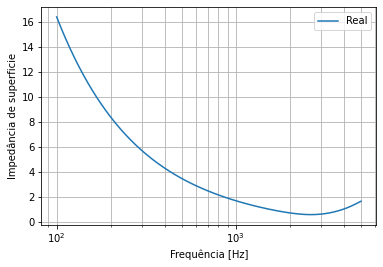

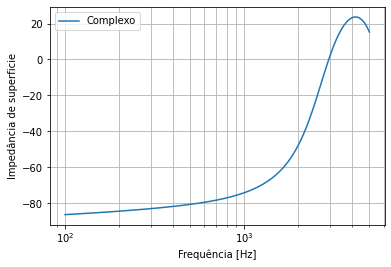

In [23]:
z_ar = AP.c0*AP.rho0
d=0.025 # Espessura do material
w= AC.freq*2*np.pi
Zs = ((-1j*BC.rhoc*BC.cc)/np.tan((w/BC.cc)*d))/(z_ar)

plt.semilogx(AC.freq, abs(Zs), label='Real')
#plt.xlim(20, 10000)
#plt.ylim(0, 100)
plt.xlabel('Frequência [Hz]')
plt.ylabel('Impedância de superficie')
plt.legend()
plt.grid(True,which="both")
#plt.savefig('L_fixo.png')
plt.show()

plt.semilogx(AC.freq, np.angle(Zs,deg=True), label='Complexo')
#plt.xlim(20, 10000)
#plt.ylim(0, 100)
plt.xlabel('Frequência [Hz]')
plt.ylabel('Impedância de superficie')
plt.legend()
plt.grid(True,which="both")
#plt.savefig('L_fixo.png')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


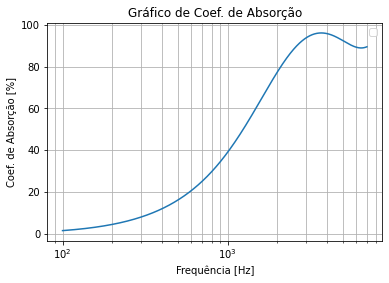

In [6]:
# Coeficiente de reflexão e absorção
Reflexao = (Zs - 1) / (Zs + 1)
Absorcao = 1 - (np.abs(Reflexao) ** 2)  # 1 - |R|²
plt.title("Gráfico de Coef. de Absorção")
plt.semilogx(AC.freq, 100*Absorcao)
#plt.xlim(20, 10000)
#plt.ylim(0, 100)
plt.xlabel('Frequência [Hz]')
plt.ylabel('Coef. de Absorção [%]')
plt.legend()
plt.grid(True,which="both")
#plt.savefig('L_fixo.png')
plt.show()

In [54]:
Absorcao[3000]

0.9997619914440953

In [67]:
# Salvar os dados p importar no MATLAB
from scipy.io import savemat
#savemat('G:\Meu Drive\TCC\Simulacao_computacional\minicamara_comMat\espessura2_5cm\Zs_DBM_cte0_004_RIs_simuladas.mat',{'RIs':ir,'freq':AC.freq})
savemat('G:\\Meu Drive\\TCC\\Simulacao_computacional\\pressao_1tetra.mat',{'p1':p1,'freq':AC.freq})



### Geração da malha, inicializando a classe FEM3D com os dados de entrada e o plote da geomeria com a malha 2D


In [164]:
grid = fd.GridImport3D(AP,path_to_geo,S,R,fmax = fmax,num_freq=12,scale=1000,order=1,load_method='meshio')
obj = fd.FEM3D(grid,S,R,AP,AC,BC)
obj.plot_problem(renderer='browser',saveFig=False,camera_angles=['diagonal_front'],extension='png')

In [165]:
obj.compute()

100%|██████████| 6901/6901 [8:25:12<00:00,  4.39s/it]


Time taken: 505.2210048357646 min


In [65]:
obj.evaluate(R)

0.004029098202657194
0.001858253979780331
0.0004416666666666666
0.0004416666666666666
0.005591435983892953
0.007630642493467351
0.002676522152968643
0.0037546269116125785
0.007737866288375237
0.0037442655855422615


array([[  -0.89574844+803.15402494j,   -0.98031166+801.5561609j ,
          -0.8966027 +803.13888616j, ...,   -0.89800541+803.13107223j,
          -0.93880969+802.39899742j,   -0.89764743+803.13360476j],
       [  -0.86082609+801.04145479j,   -0.94745518+799.41615907j,
          -0.86170407+801.02605683j, ...,   -0.86314205+801.01811366j,
          -0.90493882+800.27347862j,   -0.86277501+801.02068848j],
       [  -0.82508606+799.09040005j,   -0.91382603+797.43720232j,
          -0.82598831+799.07473853j, ...,   -0.82746231+799.06666402j,
          -0.87027309+798.30925345j,   -0.82708602+799.06928182j],
       ...,
       [-503.83794957+196.53502874j, -569.64379371-226.37028545j,
        -486.30598648+191.85270701j, ..., -494.24634856+191.84694409j,
        -587.58675069 -23.930756j  , -494.24707642+192.26530023j],
       [-500.77065445+205.64099874j, -573.93249094-216.31560956j,
        -483.30163804+200.63918602j, ..., -491.24995533+200.77680918j,
        -588.41424673 -13.45228704j

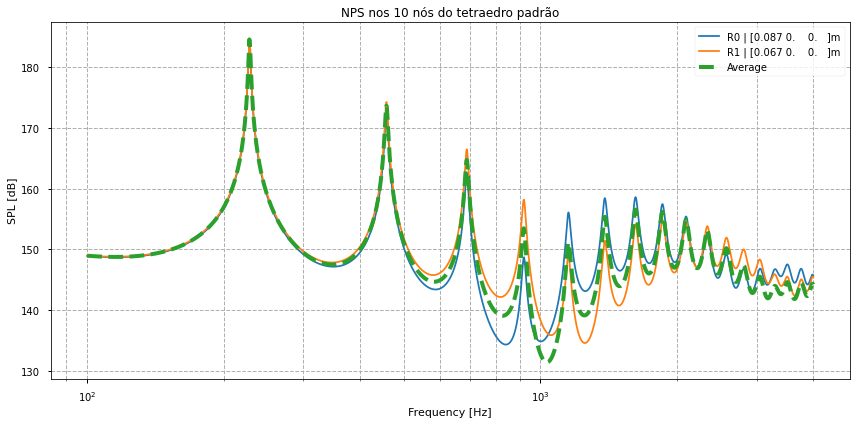

In [44]:
plt.style.use('seaborn-notebook')
plt.figure(figsize=(12,6))

if len(obj.R.coord)==1:
  plt.semilogx(obj.freq, p2SPL(obj.pR), linestyle='-', label=f'R | {obj.R.coord[0]}m')
else:
  for i in range(len(obj.R.coord)):
      plt.semilogx(obj.freq, p2SPL(obj.pR[:,i]), linestyle='-', label=f'R{i} | {obj.R.coord[i,:]}m')

if len(obj.R.coord) > 1:
  pR_med = np.mean(obj.pR,axis=1)
  plt.semilogx(obj.freq, p2SPL(pR_med), linestyle='--', label='Average', linewidth=4)
plt.title('NPS nos 10 nós do tetraedro padrão')
plt.grid(linestyle = '--', which='both')
plt.legend(loc='best')
plt.xlabel('Frequency [Hz]')
plt.ylabel('SPL [dB]')
#plt.ylim(40,160)
#plt.ylim(40,160)
plt.tight_layout()
plt.show()

### Cálculo das pressões com o método de elementos finitos

In [7]:
#obj.compute() # debug e comparar vel const e dpendente freqa
import pickle
with open("G:\Meu Drive\TCC\Simulacao_computacional\codes\dados-pickle\simulacao_tuboImpedancia1_12_5k.pkl","rb") as arquivo:
  obj = pickle.load(arquivo)
#obj.evaluate(R)
# with open("G:\Meu Drive\TCC\Simulacao_computacional\codes\dados-pickle\simulacao_tuboImpedancia1_12_5k.pkl", "wb") as arquivo:
#     pickle.dump(obj, arquivo)


In [8]:

R = fd.Receiver()
R.coord = np.array([[0.087,0,0], # Simulando a medição do tubo
                    [0.067,0,0]]) 
obj.evaluate(R)

0.005433239922642305
0.005326325922626274


array([[ -1.07620471+706.44472101j,  -0.97525286+710.52534991j],
       [ -1.054377  +704.33915887j,  -0.95088457+708.48981472j],
       [ -1.03203981+702.37405928j,  -0.92594812+706.59593292j],
       ...,
       [273.70730771+348.98791275j, 123.19762815-541.31107793j],
       [275.95287631+347.774264j  , 119.59685649-542.01301615j],
       [278.22774179+346.58619275j, 116.00531594-542.75436403j]])

In [9]:
p2 = obj.pR[:,1]
p1 = obj.pR[:,0]
H = p2/p1
diam = 0.0277 #diametro do tubo de impedancia
k_comp = (obj.w/obj.c0)#-1j*(1.94*10**(-2))*(np.sqrt(AC.freq)/(AC.c0*diam))
s = R.coord[0,0]-R.coord[1,0]
reflexao_simu = ( (H - np.exp(-1j*k_comp*s)) / (np.exp(1j*k_comp*s) - H) ) * (np.exp(2j*k_comp*R.coord[0,0]))
absorcao_simu = 1 - np.abs(reflexao_simu**2)

# Calculo da velocidade de particula

In [11]:
import numpy as np

qsi1=0; qsi2=0; qsi3=0; # primeiro nó do elemento padrao (TET10)
ind = np.argwhere(obj.domain_index_surf==5)[:,0]
con = obj.elem_surf[ind,:] #obj.elem_surf[ind,:] # use unique p pegar os nós da superficie e as coord
coord_mat = obj.nos[np.unique(con),:] #p freq mais alta
#coord_tetra = obj.nos[obj.elem_vol[844,:],:]


In [ ]:
ind = np.argwhere(obj.nos[:,0]==0.025)[:,0]
np.argwhere(obj.elem_vol==11)

In [13]:
coord_el_med=np.array([[0,0,0],
                       [1,0,0],
                       [0,1,0],
                       [0,0,1],
                       [0.5,0,0],
                       [0.5,0.5,0],
                       [0,0.5,0],
                       [0,0,0.5],
                       [0.5,0,0.5],
                       [0,0.5,0.5]])

# coord_el_med = np.array([[0,0,0],
#                          [1,0,0],
#                          [0,1,0],
#                          [0,0,1]])
tel=obj.c0/(6*5000) # ok tamanho de elemento
#pontos_mat = obj.nos[ind,:]
coord_el_med=coord_el_med-np.array([qsi1,qsi2,qsi3])  # translação necessária no espaço
coord_el_med=coord_el_med*tel+np.array([[0.025,0,0]])#np.array([[0.025,-0.0097,-0.0097]])#coord_mat[5,:] # translação necessária no espaço com elemento redimensionado

#R = fd.Receiver()
R.coord = coord_el_med
obj.evaluate(R)

0.002523117922182699
0.0024310383425778528
0.002341035480286037
0.002416666666666666
0.0009762652953432756
0.0028071442491641473
0.0011444899572207925
0.0027089346443383636
0.0030234747835363412
0.0018540602315399645


array([[  -0.75877578+716.01676119j,   -0.81846466+714.93828323j,
          -0.75948255+716.00930066j, ...,   -0.75944082+716.01013823j,
          -0.78896478+715.51307177j,   -0.75942818+716.00990111j],
       [  -0.72909124+714.0753176j ,   -0.7902279 +712.97842193j,
          -0.72981665+714.06773129j, ...,   -0.72977388+714.06858324j,
          -0.76001135+713.56303644j,   -0.72976088+714.06834187j],
       [  -0.69872136+712.27712803j,   -0.76133693+711.16150206j,
          -0.69946584+712.26941386j, ...,   -0.69942201+712.27028043j,
          -0.73038822+711.75610946j,   -0.69940863+712.27003473j],
       ...,
       [  96.19585563+602.37254809j, -236.05181497+441.98233157j,
          95.03664405+594.53467696j, ...,   94.84103643+595.8957617j ,
         -82.99337396+595.44210998j,   94.96664425+595.3567638j ],
       [ 100.44859413+601.82813015j, -232.97451467+443.49775162j,
          99.23386596+593.99454426j, ...,   99.04753578+595.35742086j,
         -78.82014666+596.04874479j

In [22]:
obj.pR

In [31]:
grid = fd.GridImport3D(AP,path_to_geo,S,R,fmax = fmax,num_freq=6,scale=1000,order=1,load_method='meshio')
obj = fd.FEM3D(grid,S,R,AP,AC,BC)
obj.plot_problem(renderer='browser',saveFig=False,camera_angles=['diagonal_front'],extension='png')

In [15]:
#função de forma T10 - Ziekwineski OKOK - CORRIGIDO e verificado COM Figura "tetra_Zienkiewicz_TET10_.png" (*)
N = np.array([[(1-qsi1-qsi2-qsi3)*(2*(1-qsi1-qsi2-qsi3)-1)],
               [qsi1*(2*qsi1-1)],
               [qsi2*(2*qsi2-1)],
               [qsi3*(2*qsi3-1)],
               [4*qsi1*(1-qsi1-qsi2-qsi3)],
               [4*qsi1*qsi2],
               [4*qsi2*(1-qsi1-qsi2-qsi3)],
               [4*qsi3*(1-qsi1-qsi2-qsi3)],
               [4*qsi3*qsi1],
               [4*qsi2*qsi3]])
# N = np.array([[1-qsi1-qsi2-qsi3],
#               [qsi1],
#               [qsi2],
#               [qsi3]])

# GNi = np.array([[-1, 1, 0, 0], [-1, 0, 1, 0], [-1, 0, 0, 1]], dtype=np.complex64)

# derivada da função de forma T10 - Ziekwineski OKOK - refeita, de acordo COM Figura "tetra_Zienkiewicz_TET10_.png"
GNi= np.array([[4*qsi1 + 4*qsi2 + 4*qsi3 - 3, 4*qsi1 - 1, 0, 0, 4 - 4*qsi2 - 4*qsi3 - 8*qsi1, 4*qsi2, -4*qsi2, -4*qsi3, 4*qsi3, 0],
               [4*qsi1 + 4*qsi2 + 4*qsi3 - 3, 0, 4*qsi2 - 1, 0, -4*qsi1, 4*qsi1, 4 - 8*qsi2 - 4*qsi3 - 4*qsi1, -4*qsi3, 0, 4*qsi3],
               [4*qsi1 + 4*qsi2 + 4*qsi3 - 3, 0, 0, 4*qsi3 - 1, -4*qsi1, 0, -4*qsi2, 4 - 4*qsi2 - 8*qsi3 - 4*qsi1, 4*qsi1, 4*qsi2]])



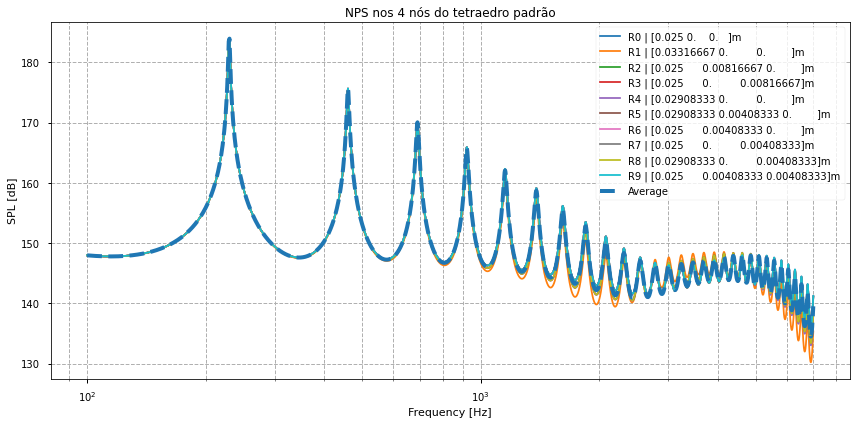

In [196]:

plt.style.use('seaborn-notebook')
plt.figure(figsize=(12,6))

if len(obj.R.coord)==1:
  plt.semilogx(obj.freq, p2SPL(obj.pR), linestyle='-', label=f'R | {obj.R.coord[0]}m')
else:
  for i in range(len(obj.R.coord)):
      plt.semilogx(obj.freq, p2SPL(obj.pR[:,i]), linestyle='-', label=f'R{i} | {obj.R.coord[i,:]}m')

if len(obj.R.coord) > 1:
  pR_med = np.mean(obj.pR,axis=1)
  plt.semilogx(obj.freq, p2SPL(pR_med), linestyle='--', label='Average', linewidth=4)
plt.title('NPS nos 4 nós do tetraedro padrão')
plt.grid(linestyle = '--', which='both')
plt.legend(loc='best')
plt.xlabel('Frequency [Hz]')
plt.ylabel('SPL [dB]')
#plt.ylim(40,160)
#plt.ylim(40,160)
plt.tight_layout()
plt.show()

In [16]:
## Jacobiano e derivada da pressão
Ja = GNi@coord_el_med
B = (np.linalg.inv(Ja)@GNi) # compute the B matrix - B é o gradiente
p_total_nodais = obj.pR.T # PRESSÃO NOS n nós do elemento de volume
delPmed=B@p_total_nodais# para todas as frequencias fazer um for, ver como fazer operando matrizes
pmed=p_total_nodais*N # calculada na coordenada qsi1 qsi2 qsi3   # 

dir = np.array([1,0,0]).reshape((1,3))
delPmed1 = dir@delPmed
u=(delPmed1)/(1j*obj.w*obj.rho0) # convençãao exp(-j\omega t)

Zmed=pmed[0]/(u) # IMPEDANCIA

In [17]:
Zmed[0,1000]

(179.39814530790596-583.9157046064888j)

In [18]:
Zs[1000]*z_ar

(187.65520597638488-593.4351605569227j)

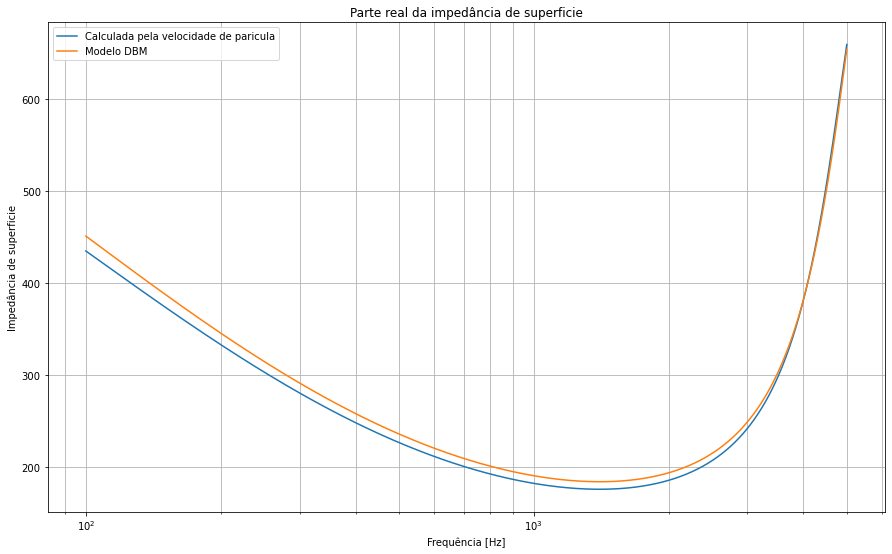

In [28]:
plt.figure(figsize=(15,9)) # ver tese do eric
# for i in range(Zs_u.shape[0]):
#     plt.semilogx(AC.freq, abs(Zs_u[i,:]), label=f'rec {i}')
plt.title('Parte real da impedância de superficie')
plt.semilogx(AC.freq, np.real(Zmed.ravel()), label='Calculada pela velocidade de paricula')
plt.semilogx(AC.freq, np.real(Zs*z_ar), label='Modelo DBM')
#plt.xlim(20, 10000)
#plt.ylim(0, 100)
plt.xlabel('Frequência [Hz]')
plt.ylabel('Impedância de superficie')
plt.legend()
plt.grid(True,which="both")
#plt.savefig('L_fixo.png')
plt.show()

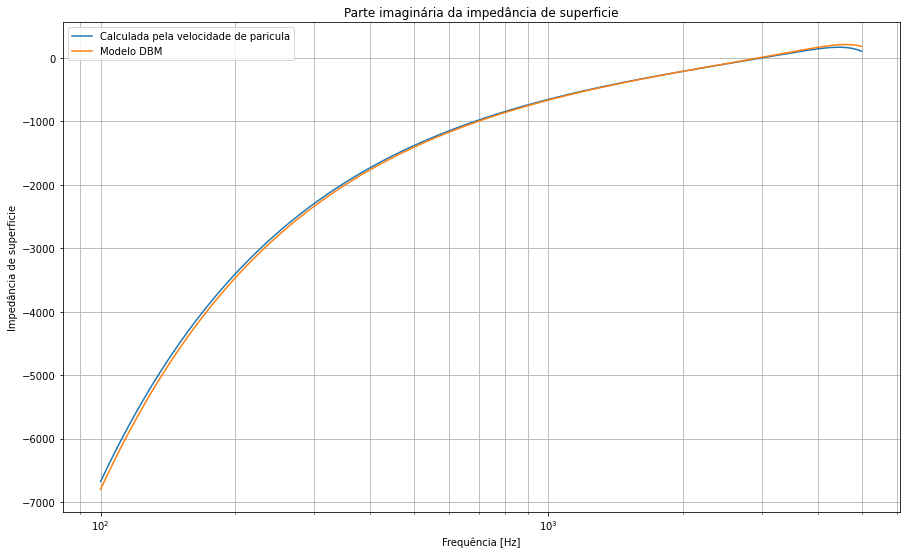

In [29]:
plt.figure(figsize=(15,9)) # ver tese do eric
# for i in range(Zs_u.shape[0]):
#     plt.semilogx(AC.freq, abs(Zs_u[i,:]), label=f'rec {i}')
plt.title('Parte imaginária da impedância de superficie')
plt.semilogx(AC.freq, np.imag(Zmed.ravel()), label='Calculada pela velocidade de paricula')
plt.semilogx(AC.freq, np.imag(Zs*z_ar), label='Modelo DBM')
#plt.xlim(20, 10000)
#plt.ylim(0, 100)
plt.xlabel('Frequência [Hz]')
plt.ylabel('Impedância de superficie')
plt.legend()
plt.grid(True,which="both")
#plt.savefig('L_fixo.png')
plt.show()

In [19]:
# Coeficiente de reflexão e absorção
Reflexao_u = (Zmed - (obj.rho0*obj.c0)) / (Zmed + (obj.rho0*obj.c0))
Abs_u = 1 - (np.abs(Reflexao_u) ** 2)  # 1 - |R|²

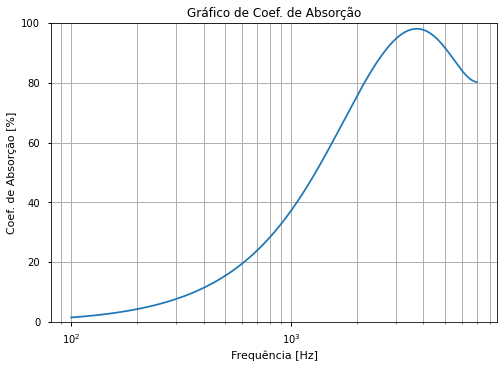

In [202]:
# Coeficiente de reflexão e absorção

plt.title("Gráfico de Coef. de Absorção")
plt.semilogx(obj.freq, 100*Abs_u.T)
#plt.xlim(20, 10000)
plt.ylim(0, 100)
plt.xlabel('Frequência [Hz]')
plt.ylabel('Coef. de Absorção [%]')
plt.grid(True,which="both")
#plt.savefig('L_fixo.png')
plt.show()

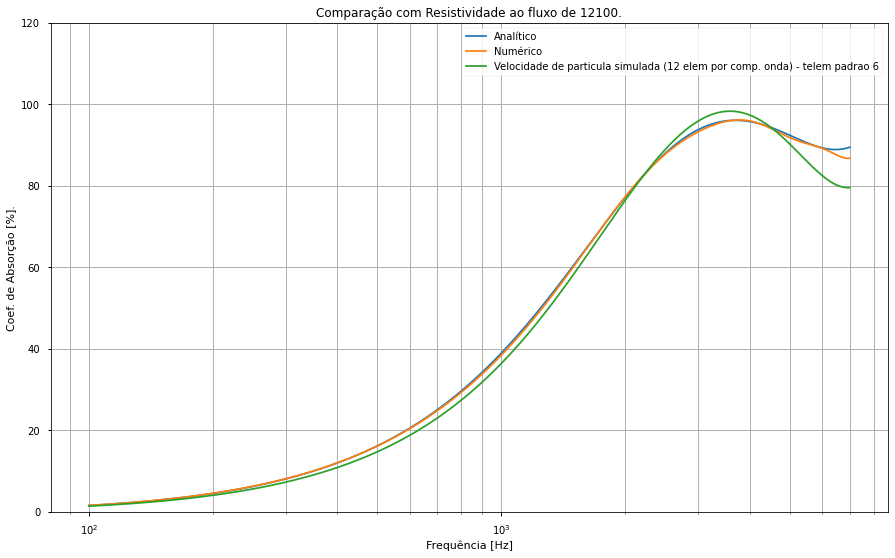

In [227]:

plt.figure(figsize=(15,9))
plt.title("Comparação com Resistividade ao fluxo de 12100.")
plt.semilogx(AC.freq, 100*Absorcao, label='Analítico')
plt.semilogx(AC.freq, 100*absorcao_simu, label='Numérico')
plt.semilogx(obj.freq, 100*Abs_u.T, label='Velocidade de particula simulada (12 elem por comp. onda) - telem padrao 6')
#plt.xlim(20, 10000)
plt.ylim(0, 120)
plt.xlabel('Frequência [Hz]')
plt.ylabel('Coef. de Absorção [%].')
plt.legend()
plt.grid(True,which="both")
#plt.savefig('G:\\Meu Drive\\TCC\\resultados\\tubo_impedancia\\res_12100\\12telMalha_coef_abs_compara_tel6_7k_poro0_9.pdf')
plt.show()

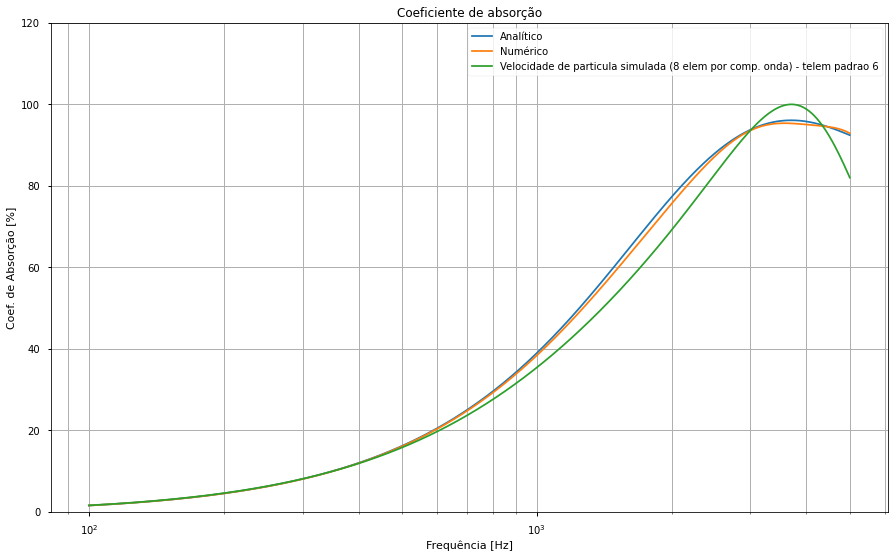

In [90]:

plt.figure(figsize=(15,9))
plt.title("Coeficiente de absorção")
plt.semilogx(AC.freq, 100*Absorcao, label='Analítico')
plt.semilogx(AC.freq, 100*absorcao_simu, label='Numérico')
plt.semilogx(obj.freq, 100*Abs_u.T, label='Velocidade de particula simulada (8 elem por comp. onda) - telem padrao 6')
#plt.xlim(20, 10000)
plt.ylim(0, 120)
plt.xlabel('Frequência [Hz]')
plt.ylabel('Coef. de Absorção [%]')
plt.legend()
plt.grid(True,which="both")
#plt.savefig('G:\\Meu Drive\\TCC\\resultados\\tubo_impedancia\\8elem_por_comp\\coef_abs_compara_tel6_7k.pdf')
plt.show()

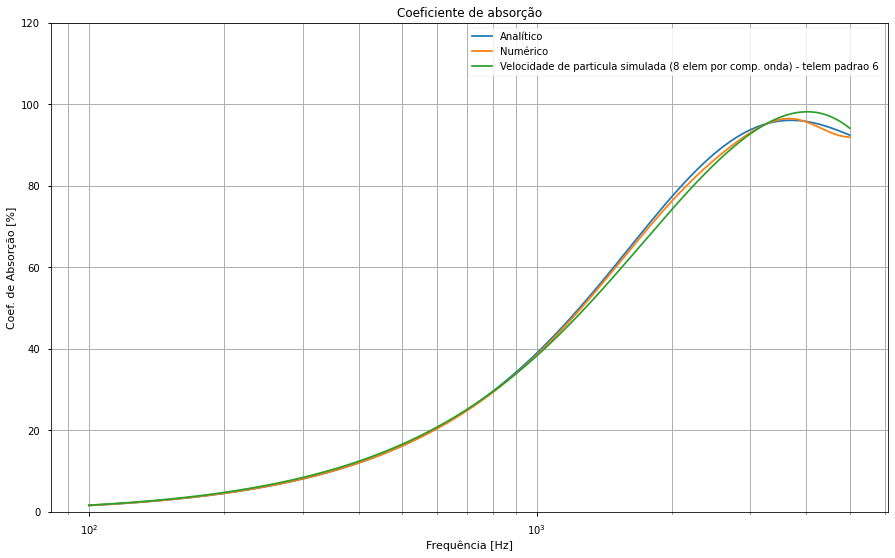

In [104]:
plt.figure(figsize=(15,9))
plt.title("Coeficiente de absorção")
plt.semilogx(AC.freq, 100*Absorcao, label='Analítico')
plt.semilogx(AC.freq, 100*absorcao_simu, label='Numérico')
plt.semilogx(obj.freq, 100*Abs_u.T, label='Velocidade de particula simulada (8 elem por comp. onda) - telem padrao 6')
#plt.xlim(20, 10000)
plt.ylim(0, 120)
plt.xlabel('Frequência [Hz]')
plt.ylabel('Coef. de Absorção [%]')
plt.legend()
plt.grid(True,which="both")
#plt.savefig('G:\\Meu Drive\\TCC\\resultados\\tubo_impedancia\\8elem_por_comp\\coef_abs_compara_tel6_7k.pdf')
plt.show()

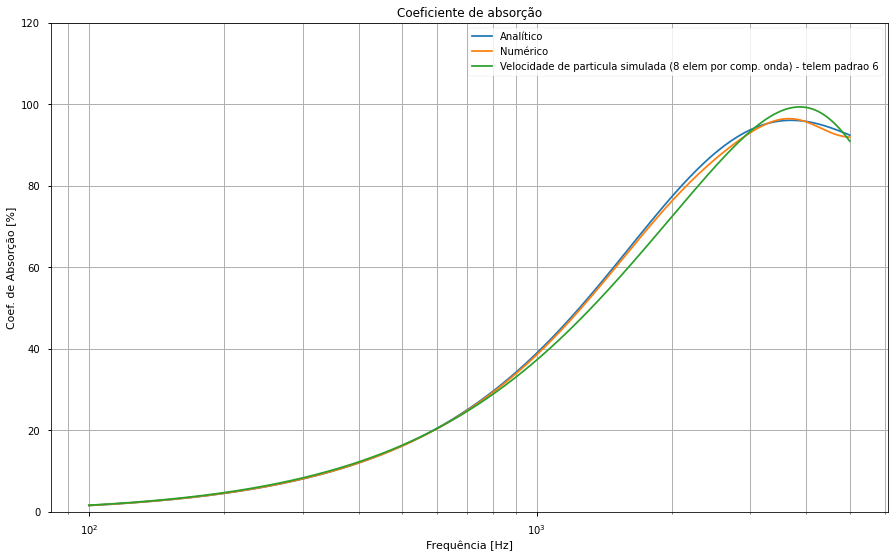

In [109]:
plt.figure(figsize=(15,9))
plt.title("Coeficiente de absorção")
plt.semilogx(AC.freq, 100*Absorcao, label='Analítico')
plt.semilogx(AC.freq, 100*absorcao_simu, label='Numérico')
plt.semilogx(obj.freq, 100*Abs_u.T, label='Velocidade de particula simulada (8 elem por comp. onda) - telem padrao 6')
#plt.xlim(20, 10000)
plt.ylim(0, 120)
plt.xlabel('Frequência [Hz]')
plt.ylabel('Coef. de Absorção [%]')
plt.legend()
plt.grid(True,which="both")
#plt.savefig('G:\\Meu Drive\\TCC\\resultados\\tubo_impedancia\\8elem_por_comp\\coef_abs_compara_tel6_7k.pdf')
plt.show()

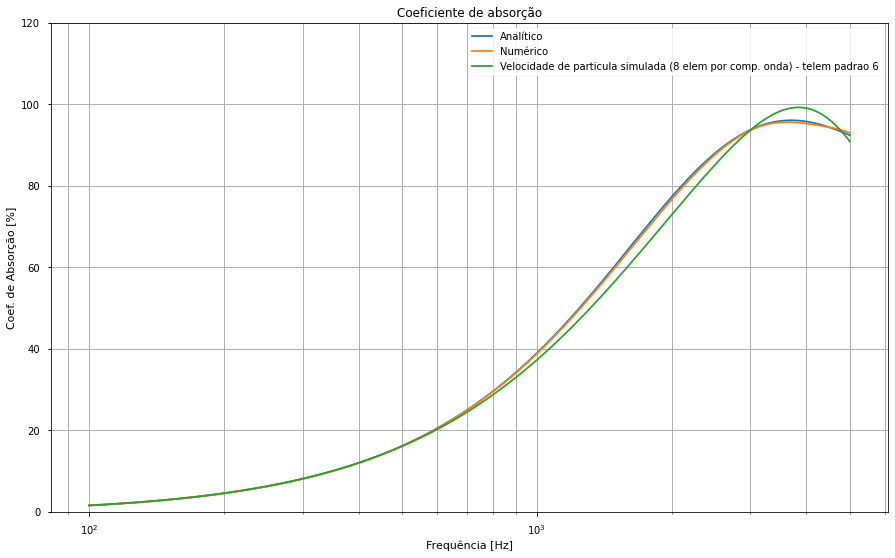

In [126]:
plt.figure(figsize=(15,9))
plt.title("Coeficiente de absorção")
plt.semilogx(AC.freq, 100*Absorcao, label='Analítico')
plt.semilogx(AC.freq, 100*absorcao_simu, label='Numérico')
plt.semilogx(obj.freq, 100*Abs_u.T, label='Velocidade de particula simulada (8 elem por comp. onda) - telem padrao 6')
#plt.xlim(20, 10000)
plt.ylim(0, 120)
plt.xlabel('Frequência [Hz]')
plt.ylabel('Coef. de Absorção [%]')
plt.legend()
plt.grid(True,which="both")
#plt.savefig('G:\\Meu Drive\\TCC\\resultados\\tubo_impedancia\\8elem_por_comp\\coef_abs_compara_tel6_7k.pdf')
plt.show()